## 🛠️ Preparação dos Dados

In [7]:
#Extração do arquivo tratado
import pandas as pd
dados = pd.read_csv('dados/df_normalizado.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               7267 non-null   object 
 1   Rotatividade             7267 non-null   int64  
 2   Sexo                     7267 non-null   object 
 3   Idoso                    7267 non-null   int64  
 4   Parceiro                 7267 non-null   int64  
 5   Dependentes              7267 non-null   int64  
 6   Termo                    7267 non-null   int64  
 7   Serviço_Telefônico       7267 non-null   int64  
 8   Várias_Linhas            7267 non-null   object 
 9   Serviço_de_Internet      7267 non-null   object 
 10  Segurança_Online         7267 non-null   object 
 11  Backup_Online            7267 non-null   object 
 12  Proteção_do_Dispositivo  7267 non-null   object 
 13  Suporte_Técnico          7267 non-null   object 
 14  Streaming_de_TV         

Remoção de Colunas Irrelevantes

In [8]:
dados = dados.drop('customerID', axis=1)
print(dados.columns)

Index(['Rotatividade', 'Sexo', 'Idoso', 'Parceiro', 'Dependentes', 'Termo',
       'Serviço_Telefônico', 'Várias_Linhas', 'Serviço_de_Internet',
       'Segurança_Online', 'Backup_Online', 'Proteção_do_Dispositivo',
       'Suporte_Técnico', 'Streaming_de_TV', 'Streaming_de_Filmes', 'Contrato',
       'Faturamento_Eletrônico', 'Forma_de_Pagamento', 'Cobrança_Mensal',
       'Cobrança_Total', 'Contas_Diárias'],
      dtype='object')


# Encoding

Transforme as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning.

In [9]:
#Identificando colunas categoricas
categorical_cols = dados.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:")
print(categorical_cols)

Categorical columns:
Index(['Sexo', 'Várias_Linhas', 'Serviço_de_Internet', 'Segurança_Online',
       'Backup_Online', 'Proteção_do_Dispositivo', 'Suporte_Técnico',
       'Streaming_de_TV', 'Streaming_de_Filmes', 'Contrato',
       'Forma_de_Pagamento'],
      dtype='object')


In [10]:
#usando o metodo de codificação get_dummies
df_encoded = pd.get_dummies(data = dados, columns = categorical_cols, dtype = int )
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Rotatividade                                  7267 non-null   int64  
 1   Idoso                                         7267 non-null   int64  
 2   Parceiro                                      7267 non-null   int64  
 3   Dependentes                                   7267 non-null   int64  
 4   Termo                                         7267 non-null   int64  
 5   Serviço_Telefônico                            7267 non-null   int64  
 6   Faturamento_Eletrônico                        7267 non-null   int64  
 7   Cobrança_Mensal                               7267 non-null   float64
 8   Cobrança_Total                                7267 non-null   float64
 9   Contas_Diárias                                7267 non-null   f

    Verificação da Proporção de Evasão

Preciso calcular a proporção de clientes que evadiram em relação aos que permaneceram ativos. Avalie se há desequilíbrio entre as classes, o que pode impactar modelos preditivos e a análise de resultados.

In [11]:
contagem_rotatividade = df_encoded['Rotatividade'].value_counts()
print("Contagem de clientes por Rotatividade:")
print(contagem_rotatividade)

# Calculate and print the proportion
total_customers = contagem_rotatividade.sum()
proporcao_rotatividade = contagem_rotatividade / total_customers

print("\nProporção de clientes por Rotatividade:")
print(proporcao_rotatividade)


print("\nAvaliação de Desequilíbrio de Classes:")
if proporcao_rotatividade[1] < 0.3:
    print("Há um desequilíbrio significativo nas classes (menos de 30% de clientes com Rotatividade).")
else:
    print("As classes estão relativamente equilibradas.")

Contagem de clientes por Rotatividade:
Rotatividade
0    5398
1    1869
Name: count, dtype: int64

Proporção de clientes por Rotatividade:
Rotatividade
0    0.74281
1    0.25719
Name: count, dtype: float64

Avaliação de Desequilíbrio de Classes:
Há um desequilíbrio significativo nas classes (menos de 30% de clientes com Rotatividade).


##  🎯 Correlação e Seleção de Variáveis

    Analise da correlação

Correlation with 'Rotatividade':
Rotatividade                                    1.000000
Contrato_Month-to-month                         0.395584
Segurança_Online_No                             0.335656
Suporte_Técnico_0                               0.330446
Serviço_de_Internet_Fiber optic                 0.300949
Forma_de_Pagamento_Electronic check             0.294626
Backup_Online_No                                0.263111
Proteção_do_Dispositivo_0                       0.246919
Contas_Diárias                                  0.189866
Cobrança_Mensal                                 0.189866
Faturamento_Eletrônico                          0.186666
Idoso                                           0.146733
Streaming_de_Filmes_0                           0.128721
Streaming_de_TV_0                               0.126795
Streaming_de_TV_1                               0.062430
Streaming_de_Filmes_1                           0.060586
Várias_Linhas_1                                 0.03934

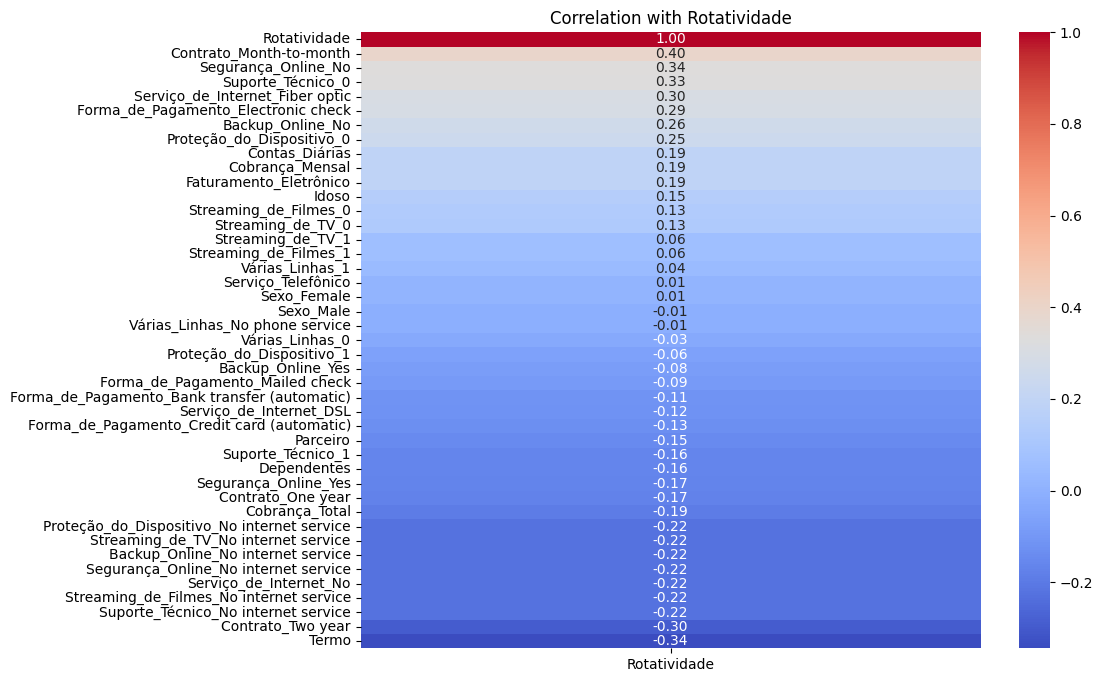

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Get correlations with the target variable 'Rotatividade'
churn_correlation = correlation_matrix['Rotatividade'].sort_values(ascending=False)

print("Correlation with 'Rotatividade':")
print(churn_correlation)

# Optional: Visualize the correlations (e.g., heatmap of top/bottom correlated features)
plt.figure(figsize=(10, 8))
sns.heatmap(churn_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Rotatividade')
plt.show()

`CORRELAÇÃO POSITIVA:`

Quanto maior o valor, maior a chance de rotatividade

•	`Contrato_Month-to-month`: Clientes com contrato mensal

•	`Segurança_Online_No`: Clientes sem segurança online

•	`Suporte_Técnico_0`: Clientes sem suporte técnico

•	`Serviço_de_Internet_Fiber optic`: Clientes com serviço de internet de fibra óptica

•	`Forma_de_Pagamento_Electronic check`: Clientes que usam cheque eletrônico como forma de pagamento

`CORRELAÇÃO NEGATIVA: `
Quanto menor o valor, menor a chance de rotatividade

•	`Termo:` Quanto maior o termo do contrato, menor a chance de rotatividade.

•	`Contrato_Two year:` Clientes com contrato de dois anos parecem ter uma chance menor de rotatividade.

•	`Serviço_de_Internet_No:` Clientes sem serviço de internet parecem ter uma chance menor de rotatividade.

•	`Segurança_Online_No internet service, Streaming_de_TV_No internet service, Backup_Online_No internet service, Proteção_do_Dispositivo_No internet service, Streaming_de_Filmes_No internet service, Suporte_Técnico_No internet service:`colunas relacionadas à falta de serviço de internet também mostram correlação negativa,